In [2]:
ls '/content/drive/My Drive/datasets/car_data'

test/  train/  train_val_test_numpy.pkl  validation/


# Import Statements for Image Processing

In [3]:
from collections import Counter

# image processing library
from cv2 import imread, resize, cvtColor, COLOR_BGR2RGB
from glob import glob
from random import randint
from tqdm import tqdm

# plotting
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Folder definitions

In [63]:
root_folder = '/content/drive/My Drive/datasets'
class_names = ['swift', 'wagonr']
dataset_name = 'car_data'
train_folder = 'train'
validation_folder = 'validation'
test_folder = 'test'

In [5]:
def get_files_list(folder_name):
  '''
  A method to read the list of files from a folder.
  '''
  files_list = []
  for class_name in class_names:
    for file_name in glob(f'{root_folder}/{dataset_name}/{folder_name}/{class_name}/*.jpg'):
      files_list.append(file_name)
  return files_list

In [6]:
train_list = get_files_list(train_folder)

In [7]:
train_list[0]

'/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'

In [8]:
print(f'Number of files in thNe train folder: {len(train_list)}')

Number of files in thNe train folder: 2400


In [9]:
test_list = get_files_list(test_folder)

In [10]:
print(f'Number of files in the test folder: {len(test_list)}')

Number of files in the test folder: 800


In [11]:
validation_list = get_files_list(validation_folder)

In [12]:
print(f'Number of files in the validation folder: {len(validation_list)}')

Number of files in the validation folder: 800


In [13]:
!pip install PyQt4f

ERROR: Could not find a version that satisfies the requirement PyQt4f (from versions: none)
ERROR: No matching distribution found for PyQt4f


In [14]:
import skimage.viewer
import skimage.io
image = skimage.io.imread(fname=test_list[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Viewer requires Qt
  """Entry point for launching an IPython kernel.


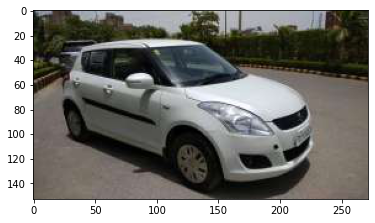

In [15]:
# viewer = skimage.viewer.ImageViewer(test_list[0])
# viewer.show()

plt.imshow(image)

In [16]:
# Defining some image dimension constants
new_w,new_h = 100,100
n_channels = 3  # RGB

In [109]:
def read_and_process_image(file_path,show_details=False):
  '''
  Read the image from the file and folder name, resize it to be 100 by 100
  and preprocess it.
  '''
  img = imread(file_path)
  if show_details:
    print(f"Shape: {img.shape}") # print only when asked

  # Resize the image to a constant height and width
  img = resize(img, (new_w, new_h))
  img = cvtColor(img, COLOR_BGR2RGB)

  # normalize the images
  img = img/255
  if show_details:
    print(f"Reshape: {img.shape}") # print details 
  return img

In [18]:
img = read_and_process_image(train_list[902], show_details=True)

Shape: (204, 272, 3)
Reshape: (100, 100, 3)


In [53]:
img.shape

(100, 100, 3)

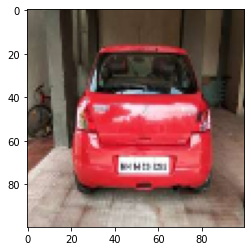

In [20]:
plt.imshow(img)

In [21]:
a = '/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'
a.split('/')
a

'/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'

In [22]:
def show_images(image_list):
  '''
  Method for debugging and visualization of images
  '''
  n:int=len(image_list)
  f = plt.figure(figsize=(15,15))
  columns = 4
  rows = 4
  for i in range(columns*rows):
    image_path = image_list[randint(0, n-1)]
    fol_name = image_path.split('/')[-2]

    # Debug the plot figure
    ax = f.add_subplot(rows, columns, i+1)
    ax.set_title(fol_name)
    img = read_and_process_image(image_path)
    plt.axis('off')
    plt.imshow(img)
  plt.show(block=True)

In [23]:
n = '/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'
n.split('/')

['',
 'content',
 'drive',
 'My Drive',
 'datasets',
 'car_data',
 'train',
 'swift',
 'snven08n0x453-IN.jpg']

In [24]:
list(range(16))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

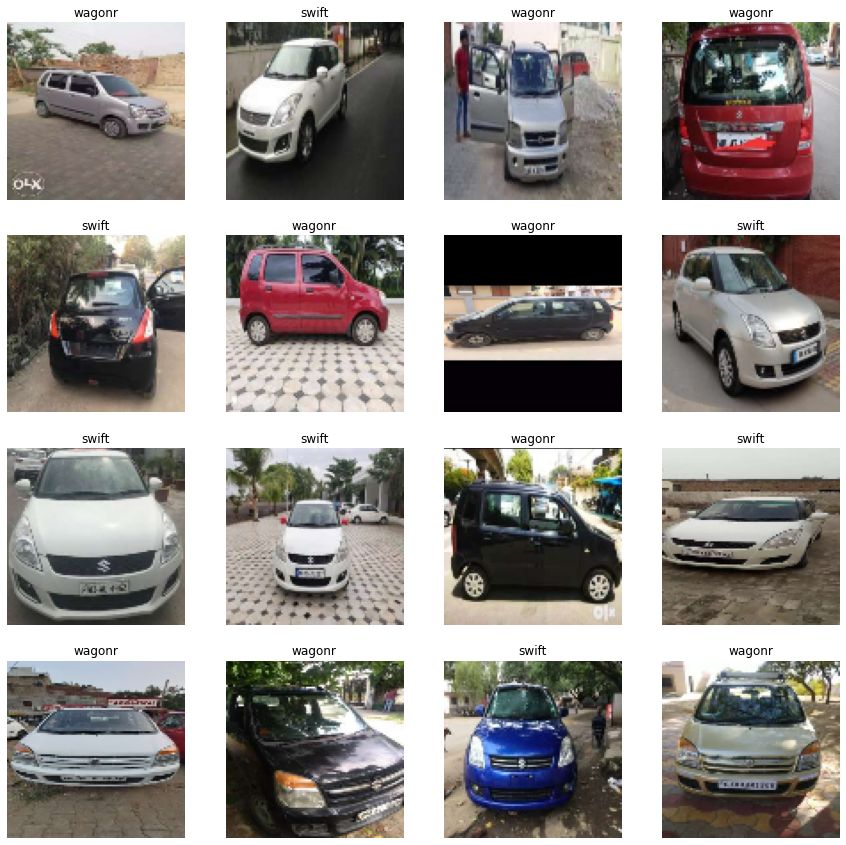

In [25]:
show_images(train_list)

# Visualization of Class Distribution

In [26]:
def visualize_classes(image_path_list):
  '''
  Visualize the images using PyPlot
  '''
  image_class_list = []
  for image_path in image_path_list:
    fol_name = image_path.split('/')[-2]
    image_class_list.append(fol_name)
  image_class_list_counter = Counter(image_class_list)
  plt.bar(image_class_list_counter.keys(), image_class_list_counter.values())
  return image_class_list

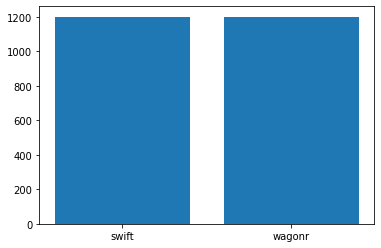

In [27]:
train_class_list = visualize_classes(train_list)

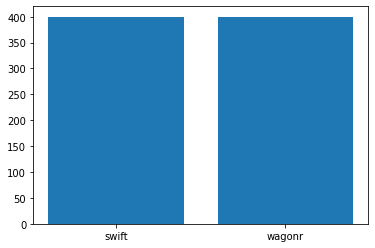

In [28]:
validation_class_list = visualize_classes(validation_list)

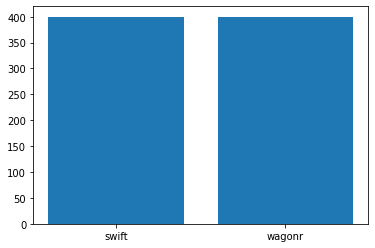

In [29]:
test_class_list = visualize_classes(test_list)

# Convert data to Numpy

In [134]:
def get_class_label_from_path(image_path):
  """Get the class name of an image from its path and assign a value 0 for swift and 1 for wagonr."""
  # sample filepath -> /content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg
  class_label = {
      'swift': 0,
      'wagonr': 1
  }
  class_name = image_path.split('/')[-2]
  return class_label[class_name]

In [135]:
val = get_class_label_from_path(train_list[0])

In [127]:
val

0

In [128]:
sample_files = ['/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg', '/content/drive/My Drive/datasets/car_data/train/wagonr/0dbdhxdm3v8s2-IN.jpg']

In [143]:
def prepare_numpy_image_array(image_path_list):
  """
  Prepare a Numpy version of the image data for further usage in training
  """
  images_numpy=np.zeros((len(image_path_list), new_w, new_h, n_channels))
  labels_numpy = np.zeros((len(image_path_list)))
  for idx in tqdm(range(len(image_path_list))):
    img = read_and_process_image(image_path_list[idx])
    label = get_class_label_from_path(image_path_list[idx])
    images_numpy[idx,:,:,:] = img
    labels_numpy[idx] = label
  return images_numpy, labels_numpy

In [144]:
img_train, img_test = prepare_numpy_image_array(sample_files)






100%|██████████| 2/2 [00:00<00:00, 81.96it/s]


In [145]:
img_test

array([0., 1.])

In [113]:
train_list[:5]

['/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg',
 '/content/drive/My Drive/datasets/car_data/train/swift/90vz9pr9pvbo1-IN.jpg',
 '/content/drive/My Drive/datasets/car_data/train/swift/tn3nr8nx4pwj1-IN.jpg',
 '/content/drive/My Drive/datasets/car_data/train/swift/jfhf494rendl2-IN.jpg',
 '/content/drive/My Drive/datasets/car_data/train/swift/lewqpflw30tw-IN.jpg']

In [146]:
img_train, train_label = prepare_numpy_image_array(train_list)
print(f'Train images shape: {train_images_numpy.shape}')






  0%|          | 0/2400 [00:00<?, ?it/s]




  1%|          | 13/2400 [00:00<00:18, 125.89it/s]




  1%|          | 23/2400 [00:00<00:20, 114.41it/s]




  1%|▏         | 34/2400 [00:00<00:21, 110.38it/s]




  2%|▏         | 46/2400 [00:00<00:21, 110.85it/s]




  2%|▏         | 59/2400 [00:00<00:20, 115.14it/s]




  3%|▎         | 72/2400 [00:00<00:19, 117.31it/s]




  3%|▎         | 83/2400 [00:00<00:21, 109.41it/s]




  4%|▍         | 97/2400 [00:00<00:19, 115.64it/s]




  5%|▍         | 109/2400 [00:01<00:22, 102.85it/s]




  5%|▌         | 121/2400 [00:01<00:21, 107.28it/s]




  6%|▌         | 134/2400 [00:01<00:20, 112.89it/s]




  6%|▋         | 152/2400 [00:01<00:17, 126.63it/s]




  7%|▋         | 170/2400 [00:01<00:16, 138.85it/s]




  8%|▊         | 188/2400 [00:01<00:14, 148.50it/s]




  8%|▊         | 204/2400 [00:01<00:14, 147.17it/s]




  9%|▉         | 223/2400 [00:01<00:13, 156.03it/s]




 10%|█         | 240/2400 [00:01<00:13, 157.89it/s]




 11%|█

Train images shape: (2400, 100, 100, 3)


In [147]:
img_val, val_label = prepare_numpy_image_array(validation_list)
print(f'Validation images shape: {val_images_numpy.shape}')






  0%|          | 0/800 [00:00<?, ?it/s]




  2%|▏         | 19/800 [00:00<00:04, 181.83it/s]




  4%|▍         | 30/800 [00:00<00:05, 147.55it/s]




  6%|▌         | 46/800 [00:00<00:04, 150.85it/s]




  8%|▊         | 62/800 [00:00<00:04, 152.74it/s]




 10%|▉         | 78/800 [00:00<00:04, 154.50it/s]




 12%|█▏        | 94/800 [00:00<00:04, 154.22it/s]




 14%|█▍        | 112/800 [00:00<00:04, 159.88it/s]




 16%|█▌        | 127/800 [00:00<00:04, 156.77it/s]




 18%|█▊        | 145/800 [00:00<00:04, 162.06it/s]




 20%|██        | 163/800 [00:01<00:03, 166.33it/s]




 22%|██▎       | 180/800 [00:01<00:03, 166.52it/s]




 25%|██▍       | 197/800 [00:01<00:03, 160.37it/s]




 27%|██▋       | 215/800 [00:01<00:03, 162.65it/s]




 29%|██▉       | 232/800 [00:01<00:03, 164.25it/s]




 31%|███       | 249/800 [00:01<00:03, 165.27it/s]




 33%|███▎      | 267/800 [00:01<00:03, 167.52it/s]




 36%|███▌      | 285/800 [00:01<00:03, 169.07it/s]




 38%|███▊      | 302/8

Validation images shape: (800, 100, 100, 3)


In [148]:
img_test, test_label = prepare_numpy_image_array(test_list)
print(f'Test images shape: {test_images_numpy.shape}')






  0%|          | 0/800 [00:00<?, ?it/s]




  1%|▏         | 11/800 [00:00<00:07, 99.20it/s]




  2%|▏         | 19/800 [00:00<00:08, 90.97it/s]




  4%|▍         | 30/800 [00:00<00:08, 93.26it/s]




  5%|▍         | 37/800 [00:00<00:09, 83.27it/s]




  6%|▌         | 46/800 [00:00<00:08, 84.30it/s]




  7%|▋         | 53/800 [00:00<00:09, 75.25it/s]




  8%|▊         | 62/800 [00:00<00:09, 78.69it/s]




  9%|▉         | 74/800 [00:00<00:08, 87.55it/s]




 11%|█▏        | 90/800 [00:00<00:07, 100.74it/s]




 14%|█▎        | 108/800 [00:01<00:05, 115.60it/s]




 15%|█▌        | 123/800 [00:01<00:05, 123.37it/s]




 17%|█▋        | 138/800 [00:01<00:05, 129.48it/s]




 20%|█▉        | 156/800 [00:01<00:04, 140.25it/s]




 22%|██▏       | 173/800 [00:01<00:04, 147.89it/s]




 24%|██▍       | 190/800 [00:01<00:04, 152.13it/s]




 26%|██▋       | 210/800 [00:01<00:03, 162.09it/s]




 28%|██▊       | 227/800 [00:01<00:03, 163.48it/s]




 31%|███       | 247/800 [00:01<0

Test images shape: (800, 100, 100, 3)


In [149]:
train_label.shape

(2400,)

# Validate Numpy and Original Data

This step helps in making sure that the transformations done e.g. conversion to Numpy and the original are one and the same. Sampling can be done with vairous examples

In [34]:
print(f'Range of pixel values in test images: [{np.amin(test_images_numpy)}, {np.amax(test_images_numpy)}]')

Range of pixel values in test images: [0.0, 1.0]


In [35]:
print(f'Range of pixel values in test images: [{np.amin(train_images_numpy)}, {np.amax(train_images_numpy)}]')

Range of pixel values in test images: [0.0, 1.0]


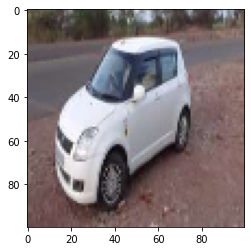

In [36]:
plt.imshow(test_images_numpy[100,:,:,:])

Shape: (126, 272, 3)
Reshape: (100, 100, 3)


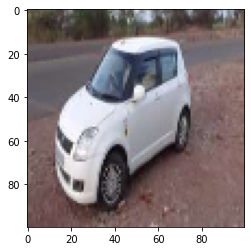

In [37]:
img = read_and_process_image(test_list[100], show_details=True)
# plot the image inline
plt.imshow(img)

# Saving the data to Pickle

Pickling the data ensures that all the preprocessing steps are preserved and the data is saved to the local disk in the state in which it was processed (https://docs.python.org/3/library/pickle.html

In [38]:
import pickle as pkl

In [39]:
pickle_path = f"{root_folder}/{dataset_name}/train_val_test_numpy.pkl"

In [40]:
pickle_path

'/content/drive/My Drive/datasets/car_data/train_val_test_numpy.pkl'

In [41]:
pkl.dump([train_images_numpy, train_class_list, val_images_numpy, validation_class_list, test_images_numpy, test_class_list], open(pickle_path, 'wb'))
print(f'Saving Numpy arrays to {pickle_path}')

Saving Numpy arrays to /content/drive/My Drive/datasets/car_data/train_val_test_numpy.pkl


# Creating Convolutional Neural Networks (CNN)

In [119]:
y_train.shape

(60000,)

In [120]:
type(y_train)

numpy.ndarray

In [121]:
type(train_label)

numpy.ndarray

In [122]:
from tensorflow.keras.utils import to_categorical

In [150]:
train_label = to_categorical(train_label)

In [152]:
train_label.shape

(2400, 2)

In [153]:
test_label = to_categorical(test_label)

In [154]:
val_label = to_categorical(val_label)

In [155]:
from tensorflow.keras.models import Sequential

In [161]:
cnn = Sequential()

In [162]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [163]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)))

In [164]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [165]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [166]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [167]:
cnn.add(Flatten())

In [168]:
cnn.add(Dense(units=128, activation='relu'))

In [169]:
cnn.add(Dense(units=2, activation='softmax'))

In [171]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

In [172]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

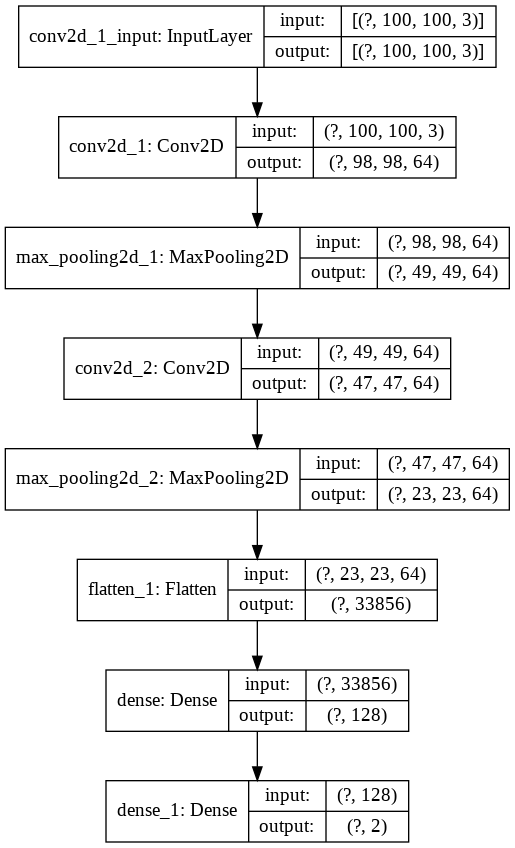

In [173]:
plot_model(cnn, to_file='cars_convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='cars_convnet.png')

In [174]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
cnn.fit(img_train, train_label, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
34/34 [==============================] - 47s 1s/step - loss: 0.9573 - accuracy: 0.5144 - val_loss: 0.7068 - val_accuracy: 0.0000e+00
Epoch 2/10
34/34 [==============================] - 46s 1s/step - loss: 0.6793 - accuracy: 0.5796 - val_loss: 0.8055 - val_accuracy: 0.1083
Epoch 3/10
34/34 [==============================] - 44s 1s/step - loss: 0.6124 - accuracy: 0.6602 - val_loss: 0.8228 - val_accuracy: 0.4167
Epoch 4/10
34/34 [==============================] - 44s 1s/step - loss: 0.5019 - accuracy: 0.7551 - val_loss: 0.7811 - val_accuracy: 0.5417
Epoch 5/10
34/34 [==============================] - 44s 1s/step - loss: 0.4021 - accuracy: 0.8264 - val_loss: 0.4399 - val_accuracy: 0.8000
Epoch 6/10
34/34 [==============================] - 44s 1s/step - loss: 0.3282 - accuracy: 0.8699 - val_loss: 0.6357 - val_accuracy: 0.7375
Epoch 7/10
34/34 [==============================] - 45s 1s/step - loss: 0.2663 - accuracy: 0.8931 - val_loss: 0.4469 - val_accuracy: 0.7625
Epoch 8/10
34/34

In [176]:
loss, accuracy = cnn.evaluate(img_test, test_label)

25/25 [==============================] - 4s 175ms/step - loss: 0.7884 - accuracy: 0.7638


In [177]:
loss

0.788448691368103

In [178]:
accuracy

0.7637500166893005

In [179]:
predictions = cnn.predict(img_test)

In [180]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 99.9745666981%
1: 0.0254297687%


In [181]:
test_label[0]

array([1., 0.], dtype=float32)

In [183]:
images = img_test.reshape((800, 100, 100))

ValueError: ignored

In [185]:
img_test.shape

(800, 100, 100, 3)

In [186]:
incorrect_predictions = []
for i, (p,e) in enumerate(zip(predictions, test_label)):
  predicted, expected = np.argmax(p), np.argmax(e)
  if predicted != expected:
    incorrect_predictions.append((i, test_list[i], predicted, expected))

In [187]:
len(incorrect_predictions)

189

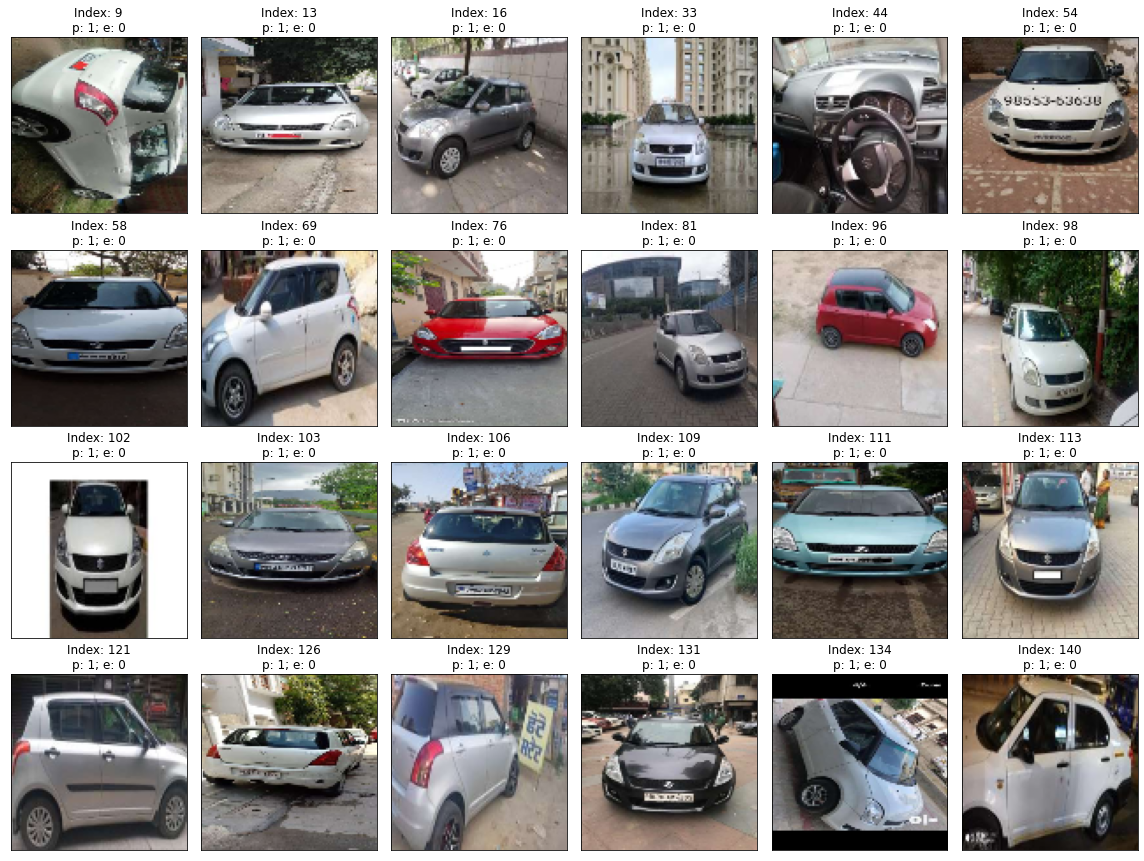

In [195]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image_path, predicted, expected = item
  img = read_and_process_image(image_path)
  axes.imshow(img)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'Index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [199]:
data = [incorrect_predictions[i][2] for i in range(len(incorrect_predictions))]

In [200]:
from collections import Counter

Counter(data)

Counter({0: 126, 1: 63})

In [126]:
train_label[200]

array([1.], dtype=float32)

In [57]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [65]:
train = image_dataset_from_directory(directory=f'{root_folder}/{dataset_name}/{train_folder}')

Found 2400 files belonging to 2 classes.


In [84]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [85]:
img = read_and_process_image(train_list[0])

In [90]:
type(img)

numpy.ndarray

In [91]:
train_images_numpy.shape

(2400, 100, 100, 3)

In [88]:
pil_img = load_img(img)
sample = img_to_array(pil_img)

TypeError: ignored

In [78]:
sample.shape

(204, 272, 3)

In [42]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [43]:
type(x_train)

numpy.ndarray

In [80]:
x_train[0].shape

(28, 28)

In [81]:
type(y_train)

numpy.ndarray

In [83]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [51]:
type(train_list)

list

In [52]:
train_list[0]

'/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'

In [46]:
print("Number of samples in the training data: " + str(len(x_train)))
print("Number of samples in the test data: " + str(len(x_test)))

Number of samples in the training data: 60000
Number of samples in the test data: 10000


In [47]:
print('Initial shape or dimensions of the x_train: ' + str(x_train.shape))

Initial shape or dimensions of the x_train: (60000, 28, 28)


In [48]:
import matplotlib.pyplot as plt
import numpy as np

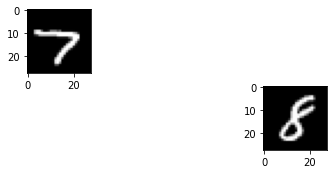

In [49]:
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))